In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
import time
from scipy.stats import linregress

from config import weather_api_key
from citipy import citipy
from datetime import datetime


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=2000)
lngs = np.random.uniform(low=-180.000, high=180.000, size=2000)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
coordinates = list(lat_lngs)

for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name, citipy.nearest_city(coordinate[0], coordinate[1]).country_code)


smithers ca
punta arenas cl
mahebourg mu
jamestown sh
ushuaia ar
jamestown sh
fortuna us
rikitea pf
kahama tz
taolanaro mg
hobart au
yellowknife ca
verkhnevilyuysk ru
paita pe
svetlogorsk ru
kruisfontein za
mataura pf
jamestown sh
saint-philippe re
stamsund no
dingle ie
ushuaia ar
esperance au
dunedin nz
jamestown sh
rikitea pf
thompson ca
souillac mu
busselton au
ushuaia ar
ribeira grande pt
kaitangata nz
saint george bm
iqaluit ca
allonnes fr
salisbury us
hobart au
bredasdorp za
ushuaia ar
busselton au
kavaratti in
asau tv
mataura pf
natal br
qaanaaq gl
qaanaaq gl
bonoua ci
atuona pf
codrington ag
aksarka ru
litoral del san juan co
khatanga ru
albany au
arraial do cabo br
daru pg
hermanus za
rio grande pe
hofn is
lunenburg ca
kachiry kz
hermanus za
ribeira grande pt
kachug ru
albany au
naze jp
qaanaaq gl
rikitea pf
iqaluit ca
san policarpo ph
hobart au
rikitea pf
chillan cl
kazalinsk kz
narsaq gl
sile tr
grand gaube mu
rikitea pf
nizhneyansk ru
yining cn
dangriga bz
albany au
comodor

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


721

In [5]:

url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
cityWeather = requests.get(city_url)
cityWeather.json()



{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 701,
   'main': 'Mist',
   'description': 'mist',
   'icon': '50n'}],
 'base': 'stations',
 'main': {'temp': 12.36,
  'feels_like': 7.11,
  'temp_min': 8.96,
  'temp_max': 15.24,
  'pressure': 995,
  'humidity': 88},
 'visibility': 1609,
 'wind': {'speed': 3, 'deg': 323, 'gust': 18.99},
 'clouds': {'all': 100},
 'dt': 1643505261,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1643457649,
  'sunset': 1643493224},
 'timezone': -18000,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [6]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
if city_weather.status_code == 200:
    print(f"City Weather found.")
else:
    print(f"City weather not found.")



City Weather found.


In [7]:
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
boston_data = city_weather.json()
boston_data["dt"]

1643505261

In [8]:
lat = boston_data["coord"]["lat"]
lng = boston_data["coord"]["lon"]
max_temp = boston_data["main"]["temp_max"]
humidity = boston_data["main"]["humidity"]
clouds = boston_data["clouds"]["all"]
wind = boston_data["wind"]["speed"]
print(lat, lng, max_temp, humidity, clouds, wind)


42.3584 -71.0598 15.24 88 100 3


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ", "+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(
            city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | smithers
Processing Record 2 of Set 1 | punta arenas
Processing Record 3 of Set 1 | mahebourg
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | fortuna
Processing Record 7 of Set 1 | rikitea
Processing Record 8 of Set 1 | kahama
Processing Record 9 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | verkhnevilyuysk
Processing Record 13 of Set 1 | paita
Processing Record 14 of Set 1 | svetlogorsk
Processing Record 15 of Set 1 | kruisfontein
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | saint-philippe
Processing Record 18 of Set 1 | stamsund
City not found. Skipping...
Processing Record 19 of Set 1 | dingle
Processing Record 20 of Set 1 | esperance
Processing Record 21 of Set 1 | dunedin
Processing Reco

In [10]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Smithers,54.7804,-127.1743,37.72,87,75,4.61,CA,2022-01-30 01:17:11
1,Punta Arenas,-53.1500,-70.9167,50.11,57,0,16.11,CL,2022-01-30 01:17:12
2,Mahebourg,-20.4081,57.7000,79.09,78,20,3.44,MU,2022-01-30 01:17:12
3,Jamestown,42.0970,-79.2353,4.32,85,0,8.05,US,2022-01-30 01:16:40
4,Ushuaia,-54.8000,-68.3000,44.26,87,100,0.00,AR,2022-01-30 01:12:57
5,Fortuna,40.5982,-124.1573,54.09,81,0,0.00,US,2022-01-30 01:17:13
6,Rikitea,-23.1203,-134.9692,76.98,71,100,8.48,PF,2022-01-30 01:17:13
7,Kahama,-3.8333,32.6000,63.95,89,100,2.82,TZ,2022-01-30 01:17:13
8,Hobart,-42.8794,147.3294,77.02,52,20,1.99,AU,2022-01-30 01:15:02
9,Yellowknife,62.4560,-114.3525,-14.28,76,40,4.61,CA,2022-01-30 01:16:04


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")


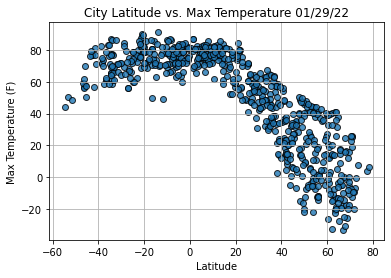

In [12]:

lats = city_data_df["Lat"]
max_temp = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]


# Get today's date in seconds.
today = time.strftime("%x")
today

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature " + time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()


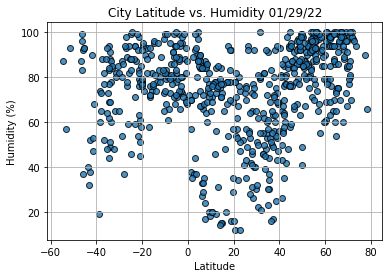

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity " + time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


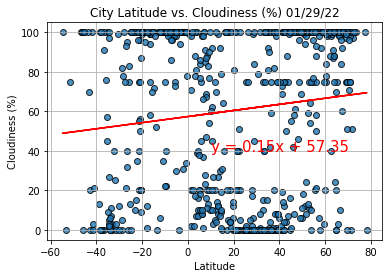

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) " + time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, cloudiness)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))


# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10, 40), fontsize=15, color="red")
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


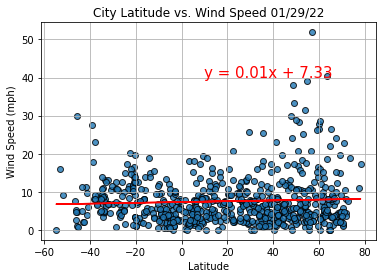

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed " + time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Perform linear regression.
(slope, intercept, r_value, p_value, std_err) = linregress(lats, wind_speed)

# Calculate the regression line "y values" from the slope and intercept.
regress_values = lats * slope + intercept

# Get the equation of the line.
line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

# Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
plt.plot(lats, regress_values, "r")
# Annotate the text for the line equation and add its coordinates.
plt.annotate(line_eq, (10, 40), fontsize=15, color="red")
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [16]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):


    # Perform linear regression.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))

    # Create a scatter plot of the x and y values.
    plt.scatter(x_values, y_values)
    # Plot the regression line with the x-values and the y coordinates based on the intercept and slope.
    plt.plot(x_values, regress_values, "r")
    # Annotate the text for the line equation and add its coordinates.
    plt.annotate(line_eq, (10, 40), fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()


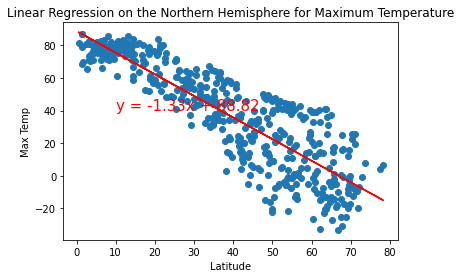

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp', (10, 40))


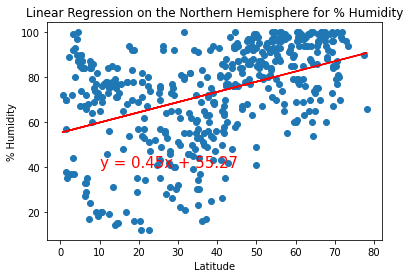

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity', (40, 10))


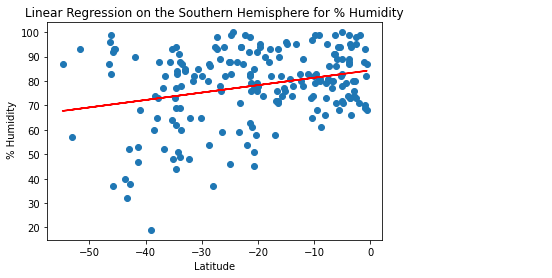

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', ' % Humidity', (-50, 15))


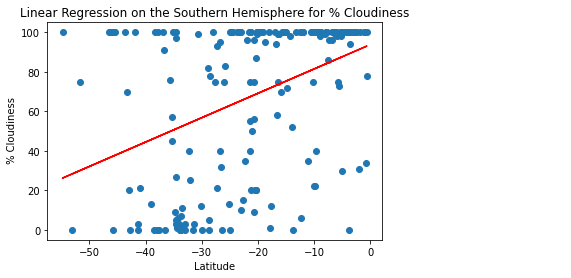

In [20]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', ' % Cloudiness', (-50, 60))


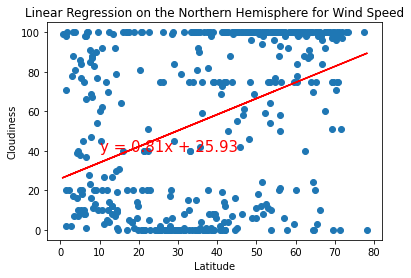

In [21]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Cloudiness', (40, 10))


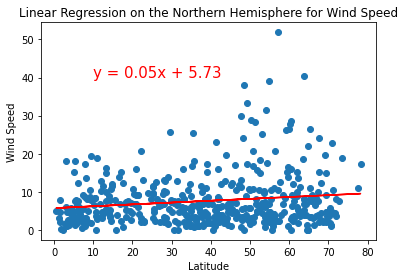

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed', (40, 35))


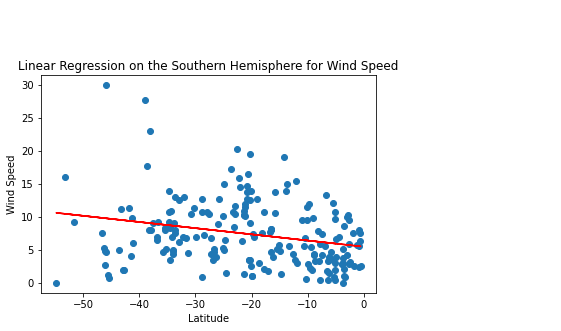

In [23]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed', (-50, 35))
